# 0. Car sales in Norway - emissions and trends


### a) Do some EDA with info, find out column names, shape of dataset, describe method to get summary descriptive statistics.

In [144]:
import pandas as pd

df = pd.read_csv("../../data/norway_new_car_sales_by_month.csv")

df.head()


,Year,Month,Quantity,Quantity_YoY,Import,Import_YoY,Used,Used_YoY,Avg_CO2,Bensin_Co2,Diesel_Co2,Quantity_Diesel,Diesel_Share,Diesel_Share_LY,Quantity_Hybrid,Quantity_Electric,Import_Electric
0,2007,1,12685,5227,2276,257,NaN,NaN,152,155,152,10072,79.4,52.5,NaN,NaN,NaN
1,2007,2,9793,2448,1992,-89,NaN,NaN,156,159,155,7222,73.7,47.4,NaN,NaN,NaN
2,2007,3,11264,1445,2626,45,NaN,NaN,159,161,158,7965,70.7,48.1,NaN,NaN,NaN
3,2007,4,8854,504,2220,-130,NaN,NaN,160,165,158,6116,69.1,48.4,NaN,NaN,NaN
4,2007,5,12007,1592,2881,7,NaN,NaN,160,163,159,8519,71.0,49.1,NaN,NaN,NaN


In [145]:
df.info() # summary of the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               121 non-null    int64  
 1   Month              121 non-null    int64  
 2   Quantity           121 non-null    int64  
 3   Quantity_YoY       121 non-null    int64  
 4   Import             121 non-null    int64  
 5   Import_YoY         121 non-null    int64  
 6   Used               61 non-null     float64
 7   Used_YoY           49 non-null     float64
 8   Avg_CO2            121 non-null    int64  
 9   Bensin_Co2         121 non-null    int64  
 10  Diesel_Co2         121 non-null    int64  
 11  Quantity_Diesel    121 non-null    int64  
 12  Diesel_Share       121 non-null    float64
 13  Diesel_Share_LY    121 non-null    float64
 14  Quantity_Hybrid    73 non-null     float64
 15  Quantity_Electric  73 non-null     float64
 16  Import_Electric    53 non-

In [146]:
df.shape # display the shape of the dataset

(121, 17)

In [147]:
df.isnull().sum()  # check for missing values in the dataset

Year                  0
Month                 0
Quantity              0
Quantity_YoY          0
Import                0
Import_YoY            0
Used                 60
Used_YoY             72
Avg_CO2               0
Bensin_Co2            0
Diesel_Co2            0
Quantity_Diesel       0
Diesel_Share          0
Diesel_Share_LY       0
Quantity_Hybrid      48
Quantity_Electric    48
Import_Electric      68
dtype: int64

In [148]:
df.sort_values(by="Year", ascending=False)


,Year,Month,Quantity,Quantity_YoY,Import,Import_YoY,Used,Used_YoY,Avg_CO2,Bensin_Co2,Diesel_Co2,Quantity_Diesel,Diesel_Share,Diesel_Share_LY,Quantity_Hybrid,Quantity_Electric,Import_Electric
120,2017,1,13055,2064,1549,330,36078.0,4047.0,84,94,118,3433,26.3,38.0,4419.0,2295.0,494.0
116,2016,9,13854,1433,1526,-373,42780.0,236.0,88,98,128,3838,27.7,39.3,3991.0,2629.0,517.0
110,2016,3,13875,-284,1253,-803,36172.0,-5255.0,88,117,131,4745,34.2,41.4,3396.0,2597.0,465.0
108,2016,1,10991,468,1219,-406,32085.0,-6261.0,96,117,130,4177,38.0,43.7,1992.0,1906.0,404.0
112,2016,5,12864,828,1432,-423,36272.0,-392.0,96,116,129,3872,30.1,41.2,3449.0,1423.0,466.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,2007,10,11646,2973,3185,597,NaN,NaN,159,160,159,8967,77.0,48.3,NaN,NaN,NaN
8,2007,9,9340,498,2897,-28,NaN,NaN,160,160,160,7005,75.0,50.5,NaN,NaN,NaN
3,2007,4,8854,504,2220,-130,NaN,NaN,160,165,158,6116,69.1,48.4,NaN,NaN,NaN
2,2007,3,11264,1445,2626,45,NaN,NaN,159,161,158,7965,70.7,48.1,NaN,NaN,NaN


In [149]:
import duckdb as db

# making a query that groups quantity by year and checks if full year is accounted.
df_quantity_by_year = db.query(
"""
        SELECT
        Year, 
        COUNT(Month) as Total_months,
        SUM(Quantity) as Total_quantity
        FROM
        df
        GROUP BY
        Year, 
        HAVING
        Total_months
        = 12
        ORDER BY
        Year ASC
""").df()

df_quantity_by_year

,Year,Total_months,Total_quantity
0,2007,12,129195.0
1,2008,12,110617.0
2,2009,12,98675.0
3,2010,12,127754.0
4,2011,12,138345.0
5,2012,12,137967.0
6,2013,12,142151.0
7,2014,12,144202.0
8,2015,12,150686.0
9,2016,12,154603.0


### b) Draw a line chart of quantity for each year. Is there a year that should be skipped?

skipped year 2017 since its not a full 12 months of data.

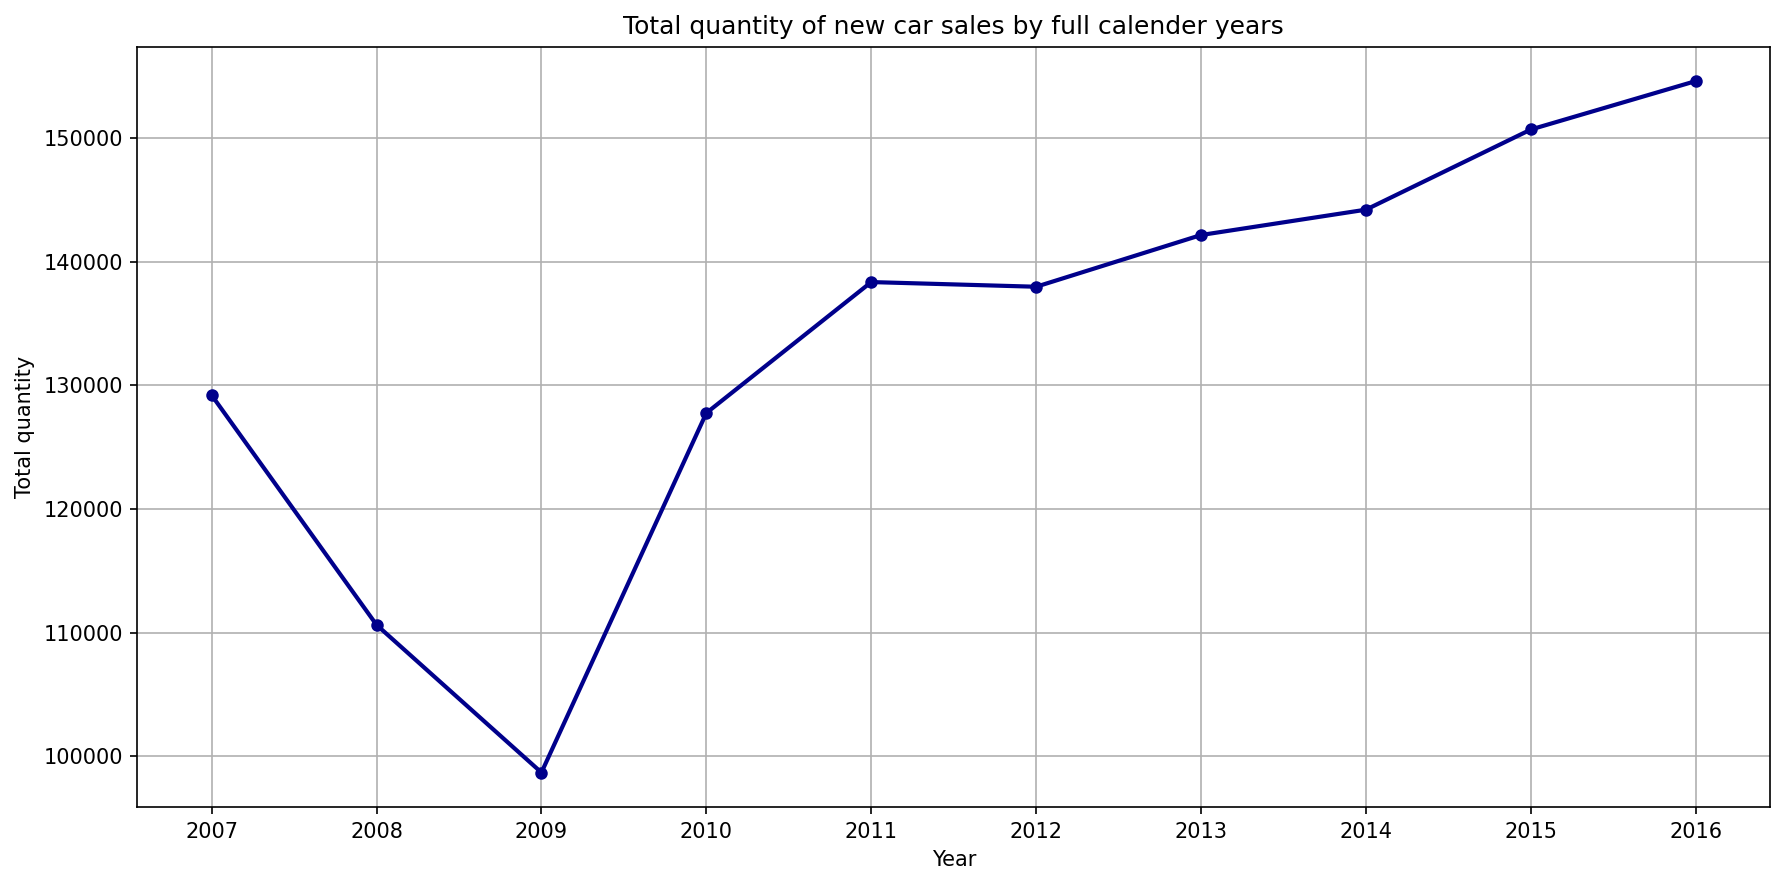

In [150]:
import matplotlib.pyplot as plt 

fig, ax = plt.subplots(figsize=(12, 6), dpi=150)

plt.grid(True)
plt.xticks(df_quantity_by_year["Year"])
ax.plot(df_quantity_by_year["Year"], df_quantity_by_year["Total_quantity"], 
        marker="o", 
        linestyle="-", 
        color="darkblue", 
        linewidth=2, 
        markersize=5)
ax.set(xlabel="Year", 
       ylabel="Total quantity", 
       title="Total quantity of new car sales by full calender years")
plt.tight_layout()
fig.savefig("sales_quantity_by_year.png")


### c) Draw a line chart of average CO2 emissions for same years that as in b)

In [151]:
# making a query that groups average CO2 emissions by year and checks if full year is accounted.
df_avg_co2_by_year = db.query(
"""
        SELECT
        Year, 
        COUNT(Month) as Total_months,
        AVG(Avg_CO2) as Avg_co2
        FROM
        df
        GROUP BY
        Year, 
        HAVING
        Total_months
        = 12
        ORDER BY
        Year ASC
""").df()

df_avg_co2_by_year

,Year,Total_months,Avg_co2
0,2007,12,159.000000
1,2008,12,158.000000
2,2009,12,150.916667
3,2010,12,140.666667
4,2011,12,134.000000
5,2012,12,129.916667
6,2013,12,123.000000
7,2014,12,110.416667
8,2015,12,99.750000
9,2016,12,93.333333


In [152]:
# testing other ways to get the average CO2 by year

# filtering the data to include only full years
df_full_years = df.groupby("Year").filter(lambda x: x["Month"].nunique() == 12)

# grouping and calculating the average CO2 emissions by year and resetting the index
df_avg_co2_by_year_v2 = df_full_years.groupby("Year")["Avg_CO2"].mean().reset_index()
print(df_avg_co2_by_year_v2)

   Year     Avg_CO2
0  2007  159.000000
1  2008  158.000000
2  2009  150.916667
3  2010  140.666667
4  2011  134.000000
5  2012  129.916667
6  2013  123.000000
7  2014  110.416667
8  2015   99.750000
9  2016   93.333333


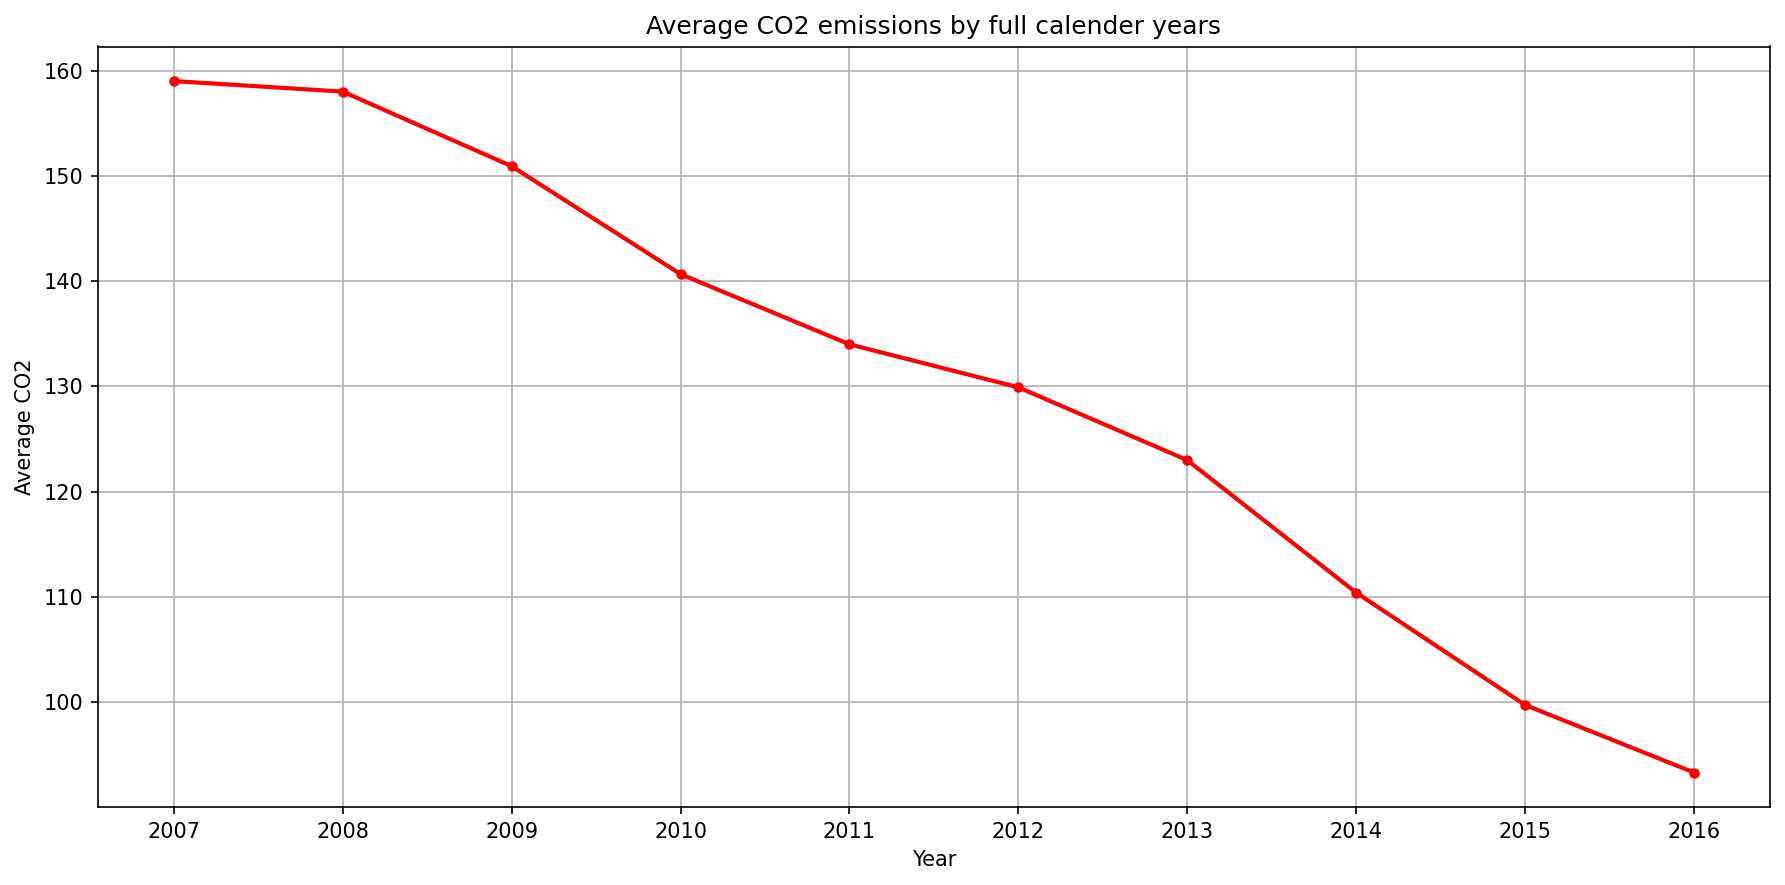

In [153]:
# line chart based on df_avg_co2_by_year_v2
fig, ax = plt.subplots(figsize=(12, 6), dpi=150)
plt.grid(True)
plt.xticks(df_avg_co2_by_year_v2["Year"])
ax.plot(df_avg_co2_by_year_v2["Year"], df_avg_co2_by_year_v2["Avg_CO2"], 
        marker="o", 
        linestyle="-", 
        color="red", 
        linewidth=2, 
        markersize=4)
ax.set(xlabel="Year", 
       ylabel="Average CO2", 
       title="Average CO2 emissions by full calender years")
plt.tight_layout()
fig.savefig("avg_co2_by_year.png")

### d) Draw a line chart of all years and months for import

In [154]:
# combining Year and Month to a column starting at day 1
df_date = pd.to_datetime(dict(year=df["Year"], month=df["Month"], day=1))

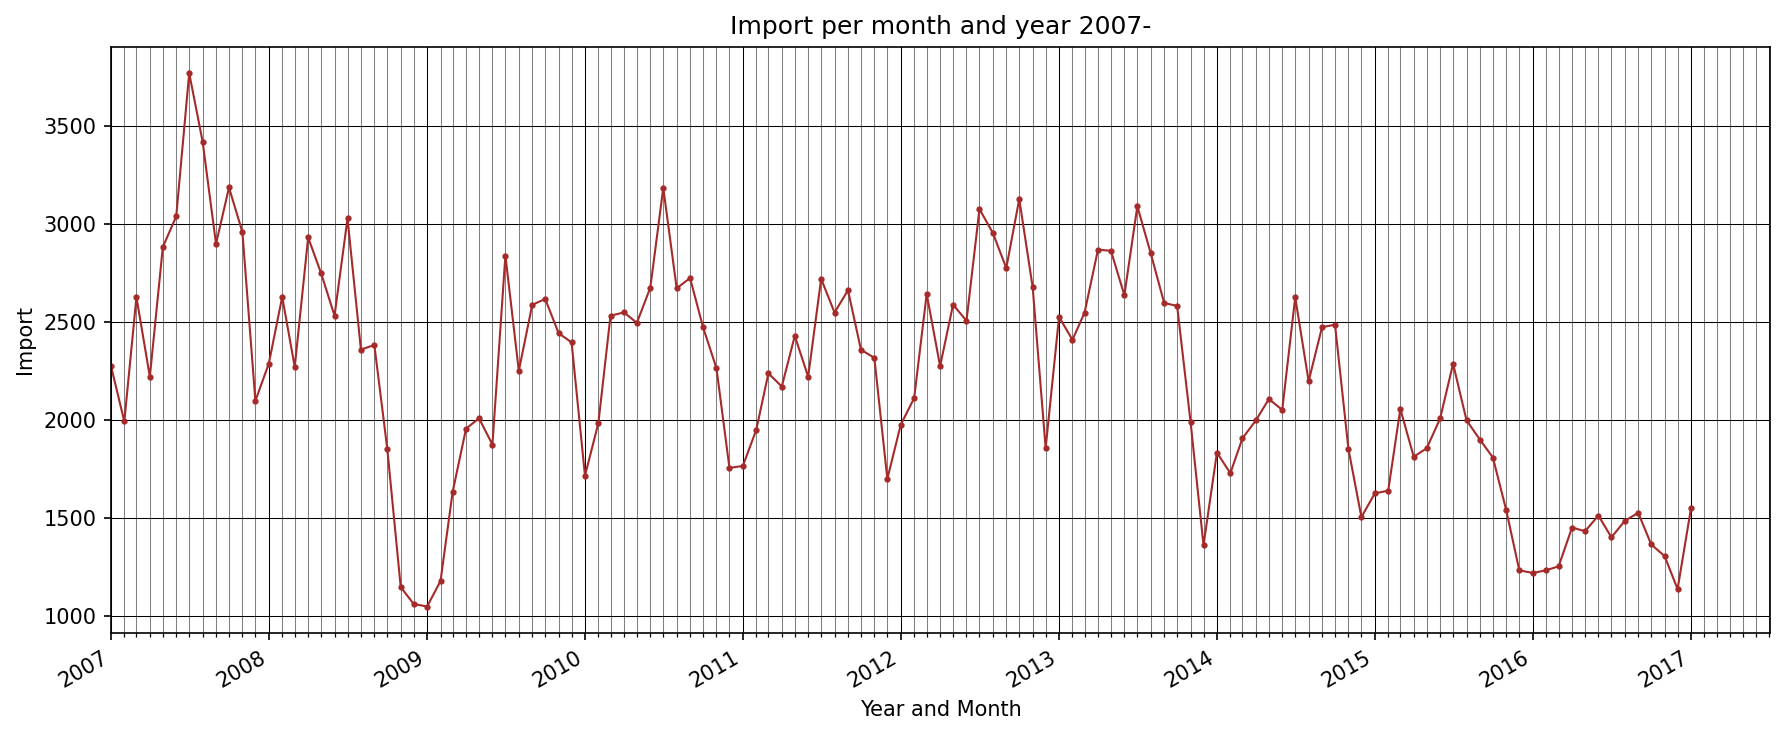

In [155]:
import matplotlib.dates as mdates
import datetime as dt

fig, ax = plt.subplots(figsize=(12, 5), dpi=150)
plt.grid(True, axis='both')
ax.plot(df_date, df['Import'], 
        marker='o', 
        linewidth=1,
        markersize=2,
        color="brown")
ax.set(
    title="Import per month and year 2007-",
    xlabel="Year and Month",
    ylabel="Import")

# year as major ticks
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# month as minor ticks
ax.xaxis.set_minor_locator(mdates.MonthLocator())

# Grid for both major and minor ticks
ax.grid(which='major', color='black', linewidth=0.5)
ax.grid(which='minor', color='gray', linewidth=0.5)

# setting the x-axis limit to start at 2007-01
ax.set_xlim(left=dt.datetime(2007, 1, 1))

fig.autofmt_xdate()
plt.tight_layout()
plt.show()
fig.savefig("import_by_year_and_month.png")

### e) Draw a line chart of all years and months for average CO2 emissions

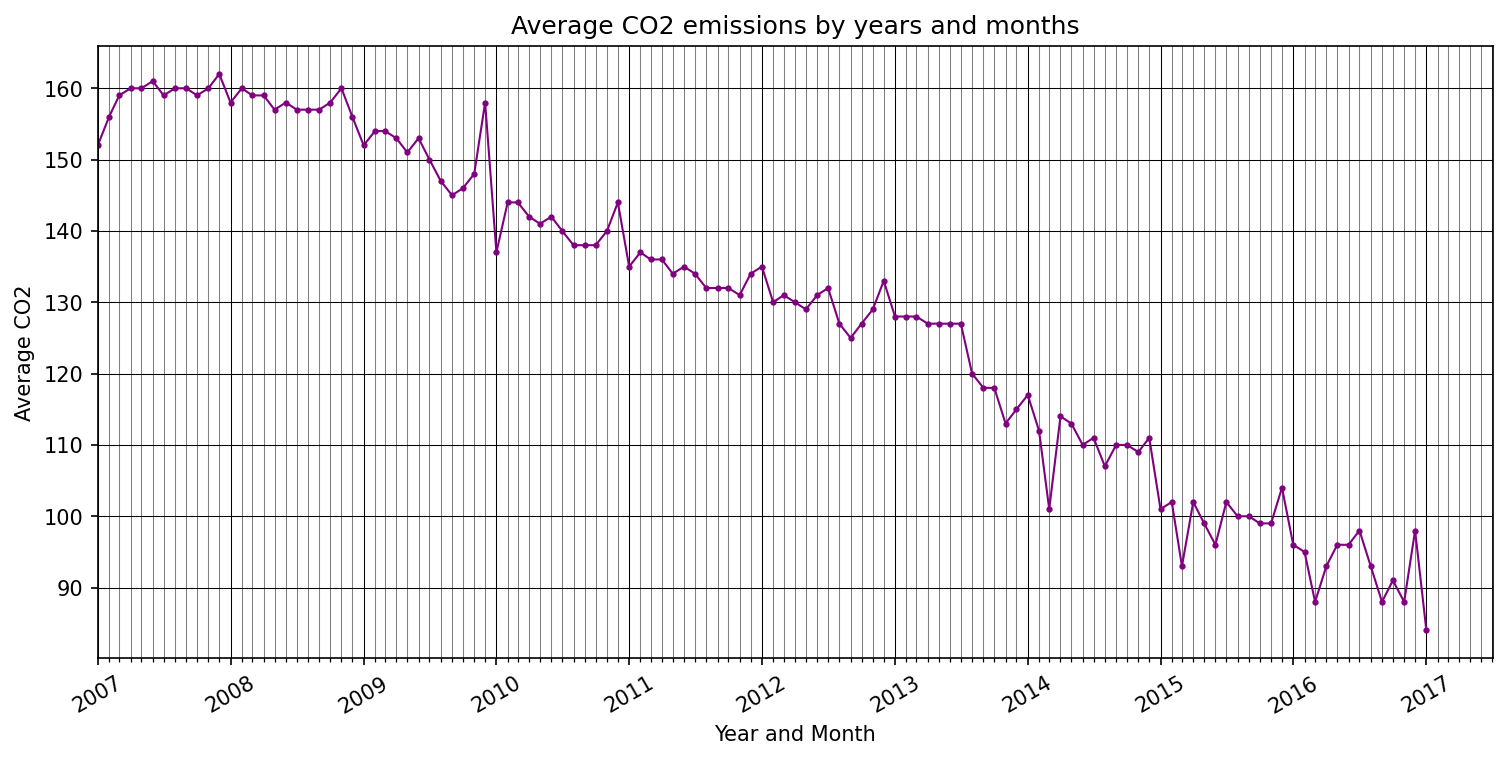

In [156]:
# line chart based on avg CO2 emissions by year and month
fig, ax = plt.subplots(figsize=(12, 6), dpi=150)
plt.grid(True)
ax.plot(df_date, df["Avg_CO2"], 
        marker="o", 
        linestyle="-", 
        color="purple", 
        linewidth=1, 
        markersize=2)

ax.set(xlabel="Year and Month", 
       ylabel="Average CO2", 
       title="Average CO2 emissions by years and months")

# year as major ticks
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# month as minor ticks
ax.xaxis.set_minor_locator(mdates.MonthLocator())

# Grid for both major and minor ticks
ax.grid(which='major', color='black', linewidth=0.5)
ax.grid(which='minor', color='gray', linewidth=0.5)

# setting the x-axis limit to start at 2007-01
ax.set_xlim(left=dt.datetime(2007, 1, 1))

fig.autofmt_xdate(ha='center')

fig.savefig("avg_co2_by_year_month.png")

### f) Draw a line chart of all years and months for electric cars import where it's relevant.

In [157]:
df_electric = (df.groupby(["Year", "Month"])["Import_Electric"].first().dropna())

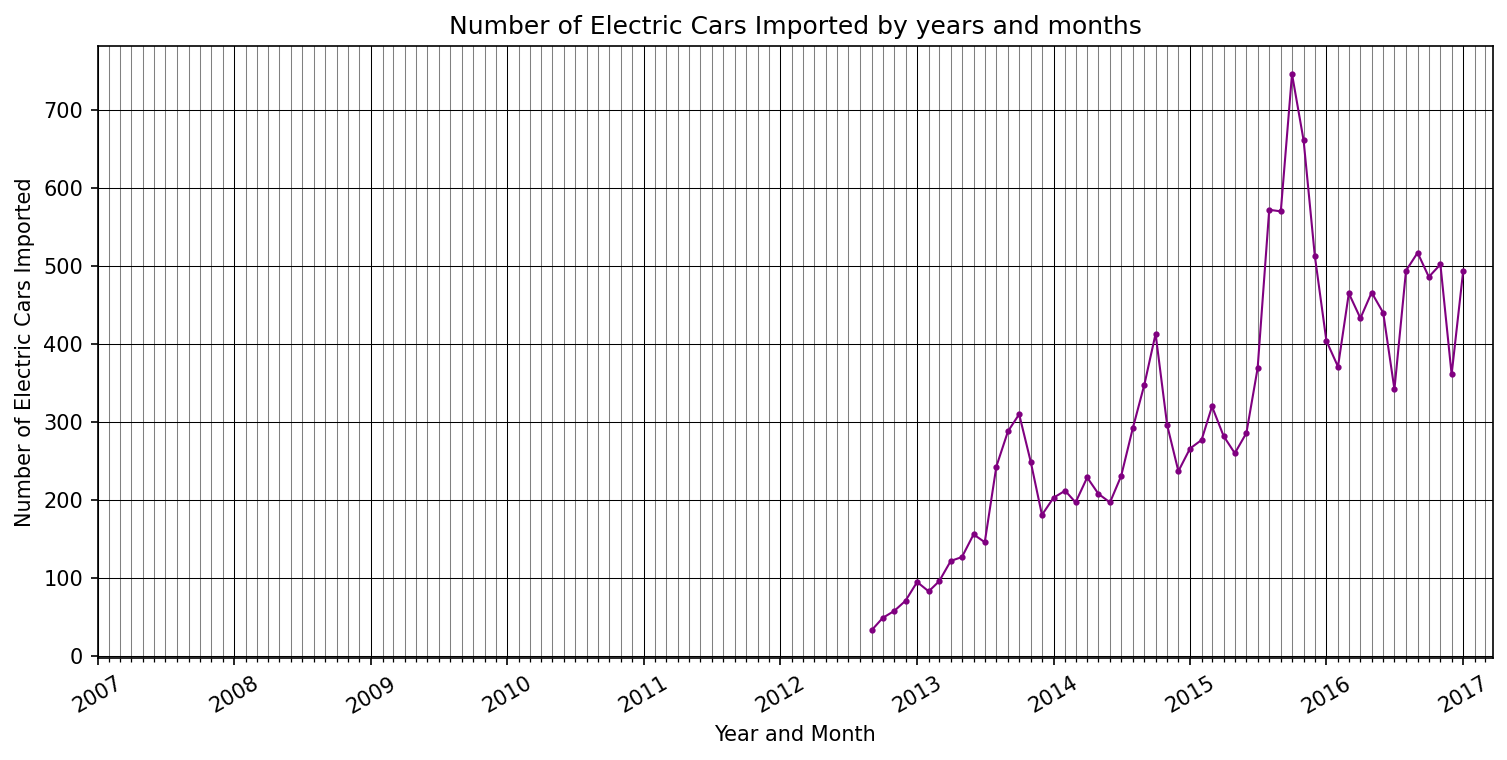

In [158]:
fig, ax = plt.subplots(figsize=(12, 6), dpi=150)
plt.grid(True)
ax.plot(df_date, df["Import_Electric"],
        marker="o", 
        linestyle="-", 
        color="purple", 
        linewidth=1, 
        markersize=2)

ax.set(xlabel="Year and Month", 
       ylabel="Number of Electric Cars Imported", 
       title="Number of Electric Cars Imported by years and months")

# year as major ticks
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# month as minor ticks
ax.xaxis.set_minor_locator(mdates.MonthLocator())

# Grid for both major and minor ticks
ax.grid(which='major', color='black', linewidth=0.5)
ax.grid(which='minor', color='gray', linewidth=0.5)

# setting the x-axis limit to start at 2007-01
ax.set_xlim(left=dt.datetime(2007, 1, 1))

fig.autofmt_xdate(ha='center')

fig.savefig("number_imported_electric_cars_by_year_month.png")

### g) Draw a line chart of average diesel share per year


quick EDA

In [159]:
df_diesel = df["Diesel_Share"]
df_diesel.head()

0    79.4
1    73.7
2    70.7
3    69.1
4    71.0
Name: Diesel_Share, dtype: float64

In [160]:
df_diesel.info()

<class 'pandas.core.series.Series'>
RangeIndex: 121 entries, 0 to 120
Series name: Diesel_Share
Non-Null Count  Dtype  
--------------  -----  
121 non-null    float64
dtypes: float64(1)
memory usage: 1.1 KB


In [161]:
df_diesel.describe()

count    121.000000
mean      60.512397
std       15.802049
min       26.300000
25%       48.500000
50%       68.700000
75%       73.700000
max       81.400000
Name: Diesel_Share, dtype: float64

In [162]:
df_diesel_share = db.query("""
    SELECT
        Year,
        AVG(Quantity) AS Avg_quantity,
        AVG(Quantity_Electric) AS Avg_electric,
        AVG(Quantity_Hybrid) AS Avg_hybrid,
        AVG(Diesel_Share) AS Avg_diesel_share,
        AVG(Quantity_Electric) / AVG(Quantity) * 100 AS Avg_electric_share,
        AVG(Quantity_Hybrid) / AVG(Quantity) * 100 AS Avg_hybrid_share
    FROM
        df
    GROUP BY
        Year
    ORDER BY
        Year ASC
""").df()

df_diesel_share

,Year,Avg_quantity,Avg_electric,Avg_hybrid,Avg_diesel_share,Avg_electric_share,Avg_hybrid_share
0,2007,10766.250000,NaN,NaN,74.216667,NaN,NaN
1,2008,9218.083333,NaN,NaN,72.300000,NaN,NaN
2,2009,8222.916667,NaN,NaN,72.241667,NaN,NaN
3,2010,10646.166667,NaN,NaN,74.875000,NaN,NaN
4,2011,11528.750000,166.333333,325.250000,75.550000,1.442770,2.821208
5,2012,11497.250000,329.166667,511.833333,64.391667,2.863003,4.451789
6,2013,11845.916667,656.833333,764.750000,52.933333,5.544808,6.455811
7,2014,12016.833333,1507.833333,965.916667,48.783333,12.547676,8.038030
8,2015,12557.166667,2149.000000,1539.416667,40.991667,17.113733,12.259268
9,2016,12883.583333,2020.416667,3160.500000,31.691667,15.682102,24.531219


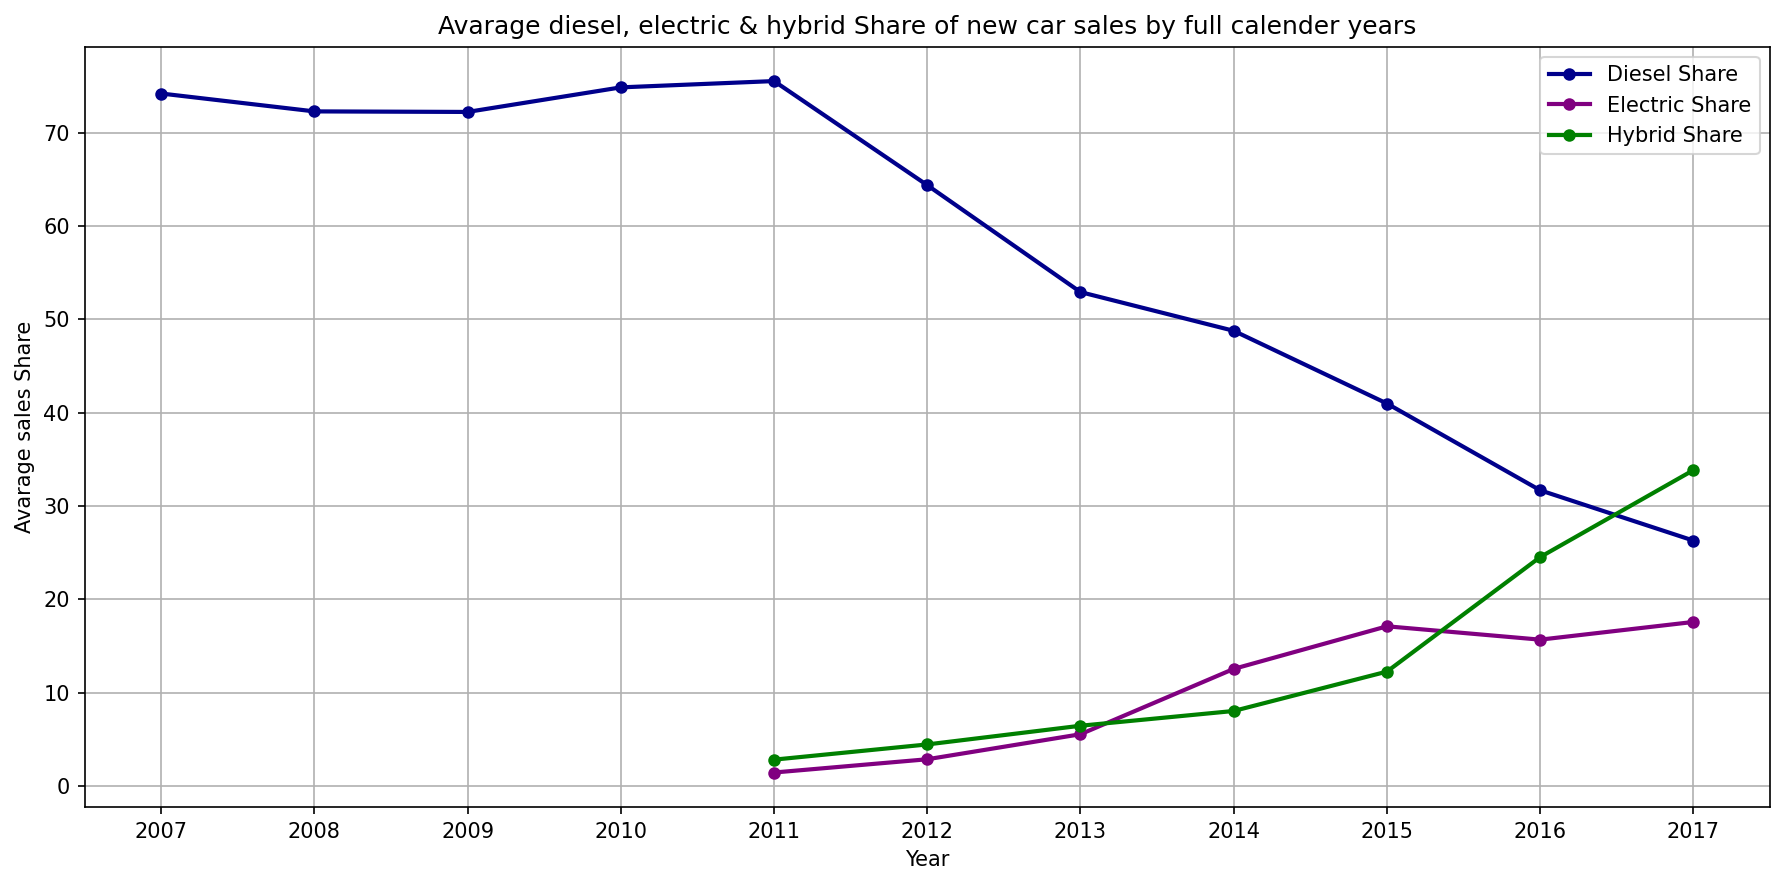

In [163]:
import matplotlib.pyplot as plt 

fig, ax = plt.subplots(figsize=(12, 6), dpi=150)

plt.grid(True)
plt.xticks(df_diesel_share["Year"])
ax.plot(df_diesel_share["Year"], df_diesel_share["Avg_diesel_share"], 
        marker="o", 
        linestyle="-", 
        color="darkblue", 
        linewidth=2, 
        markersize=5)
ax.plot(df_diesel_share["Year"], df_diesel_share["Avg_electric_share"], 
        marker="o", 
        linestyle="-", 
        color="purple", 
        linewidth=2, 
        markersize=5)
ax.plot(df_diesel_share["Year"], df_diesel_share["Avg_hybrid_share"], 
        marker="o", 
        linestyle="-", 
        color="green", 
        linewidth=2, 
        markersize=5)
ax.set(xlabel="Year", 
       ylabel="Avarage sales Share", 
       title="Avarage diesel, electric & hybrid Share of new car sales by full calender years")
plt.legend(["Diesel Share", "Electric Share", "Hybrid Share"])
plt.tight_layout()
fig.savefig("diesel_share_year.png")

 ### h) Discuss some findings with a friend based on this dataset, and do plot more graphs

 - draw more lines to compare with other fuel types etc.

